# Clustering

Sebelumnya, telah dipelajari mengenai metode Supervised Learning dalam Machine Learning. Metode Supervised Learning memiliki satu ciri-ciri yang sangat umum, yaitu data yang memiliki label dimana mesin akan mempelajari dan membuat aturan / formula terhadap data yang dimiliki berdasarkan label tersebut.  

Berbeda dengan Supervised Learning, Unsupervised Learning tidak memiliki label untuk dipelajari atau dijadikan patokan oleh mesin yang mempelajari data kita. Maka dari itu, dalam Unsupervised Learning, akan dibuat aturan sedemikian rupa sehingga data dapat dikelompokkan berdasarkan karakteristik yang mirip atau berdekatan.

Salah satu contoh dari Unsupervised Learning merupakan algoritma Clustering atau ada yang menyebutnya sebagai analisis segmentasi. Clustering merupakan metode untuk membagi data yang tidak memiliki label ke dalam kluster atau kelompok yang berbeda dimana data yang memiliki sifat / karakteristik yang serupa akan berada dalam satu kluster yang sama.

<img src="https://raw.githubusercontent.com/ArviandanaR/Praktikum-Data-Mining-2024/main/Pertemuan%208/asset/Clustering.png" alt="How Clustering Works" width="750"/>

# **Algoritma K-Means**

Salah satu algoritma Clustering yang sangat umum digunakan adalah K-Means. K-Means merupakan algoritma iteratif untuk menemukan nilai centroid / titik pusat yang tepat pada tiap kluster. Tiap nilai observasi akan dimasukkan ke dalam kluster dengan centroid yang paling dekat dengannya. Nilai centroid akan terus berubah hingga didapatkan nilai atau posisi centroid yang konsisten. Dinamakan algoritma K-Means pastinya karena suatu alasan, yakni K merupakan suatu nilai / konstanta yang menandakan jumlah centroid. Sedangkan Means karena kita akan mengubah nilai centroid dengan nilai rata-rata tiap kluster yang ada.

Berikut merupakan tahapan untuk melakukan algoritma K-Means:
- Tentukan centroid sebanyak k secara acak
- Tetapkan tiap titik observasi ke dalam kluster yang tepat dengan mencari centroid yang paling dekat
- Cari nilai centroid yang baru dengan menghitung rata-rata dari semua titik observasi dalam kluster
- Menghitung ulang jarak centroid terdekat dengan titik-titik observasi, kemudian masukkan ke dalam kluster yang baru bila diperlukan
- Ulangi langkah 3 - 5 sampai nilai centroid telah konsisten atau titik observasi dalam kluster sudah tidak berpindah lagi ataupun ketika sudah mencapai batas maksimal iterasi yang ditentukan

Untuk menentukan jumlah k yang tepat, terdapat beberapa metode yang diperuntukkan untuk memperkirakan jumlah tersebut, yaitu **Elbow Method** dan **Silhouette Method**.  

Pada dasarnya, **Elbow Method** mengukur seberapa homogen tiap kluster ketika nilai k ditambahkan, kemudian ketika nilai k telah mencapai titik dimana tidak ada kluster yang lebih homogen secara signifikan, maka titik tersebut akan kita sebut sebagai **Elbow Point**. 

<img src="https://raw.githubusercontent.com/ArviandanaR/Praktikum-Data-Mining-2024/main/Pertemuan%208/asset/Elbow.png" alt="Elbow Method" width="750"/>

In [1]:
# %pip install scikit-learn-extra
# %pip install pyclustering

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df.set_index('country', drop = True, inplace = True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


## Eksplorasi dan Visualisasi Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [6]:
df.isna().any()

child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

<Axes: >

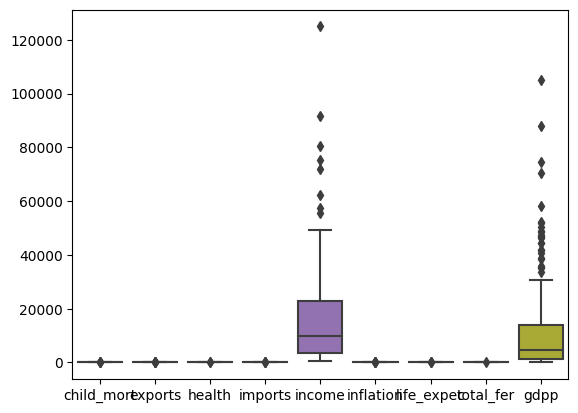

In [7]:
sb.boxplot(df)

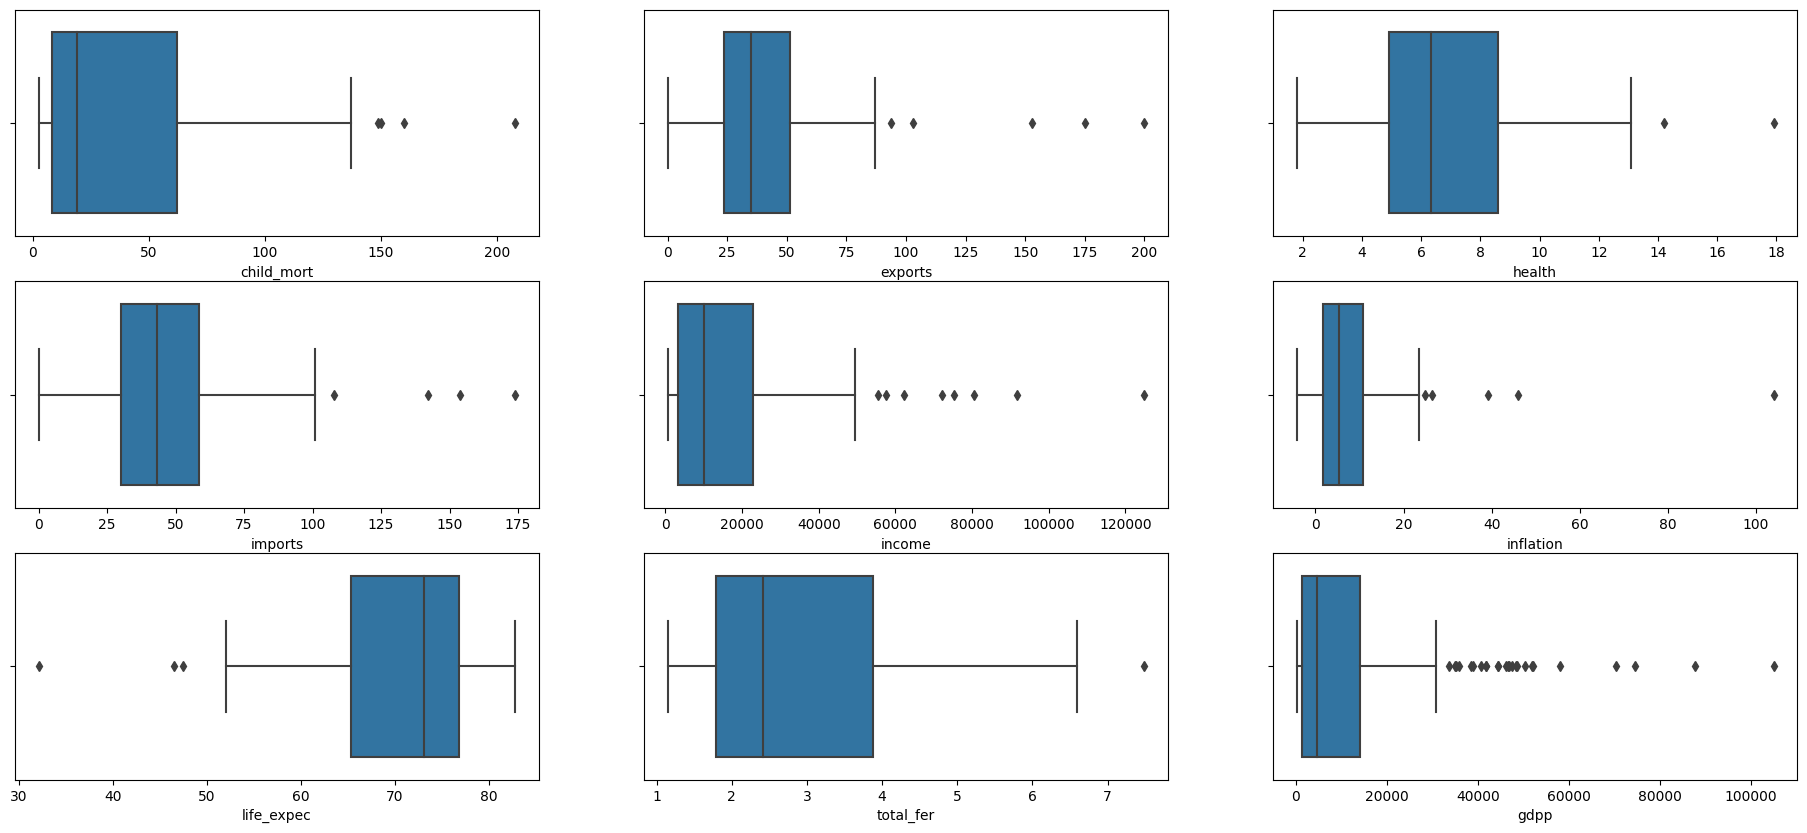

In [8]:
plt.figure(figsize=(23,10))

for i in range(len(df.columns)):
    plt.subplot(3, 3, i+1)
    sb.boxplot(x = df.iloc[:,i])
    
plt.show()

In [9]:
# # Lakukan 2 - 3 Visualisasi untuk lebih mengenal data yang kalian milik!

# ...

## Data Preprocessing

Algoritma K-Means mengasumsikan bahwa tiap kluster berbentuk bola / lingkaran dan bersifat isotropik. Yang berarti radius terhadap semua arah adalah sama. Dengan asumsi tersebut, melakukan transformasi / scaling terhadap data supaya memiliki ukuran yang relatif sama dapat memberikan hasil klustering yang baik.

In [10]:
# Melakukan scaling terhadap data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = scaler.get_feature_names_out(), index = df.index)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754


In [11]:
# # Bagaimana jika menggunakan algoritma scaling yang berbeda? 
# # Cobalah untuk melakukan preprocessing dengan algoritma yang berbeda

# from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler

# scaler = ...

## Menentukan Jumlah k Kluster

C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

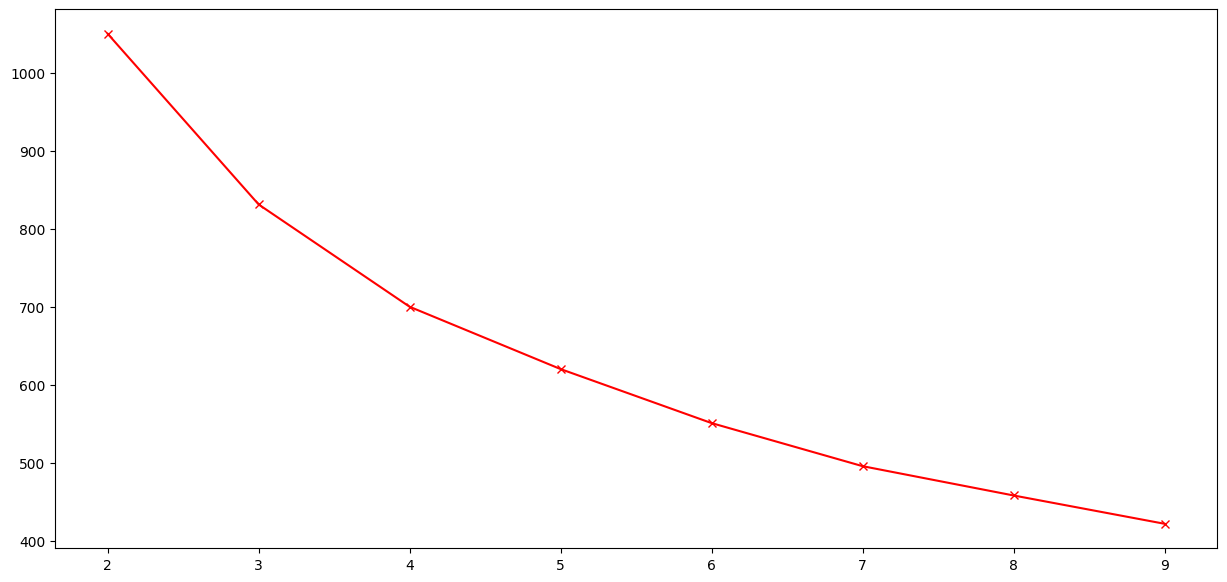

In [33]:
# Membuat grafik untuk menentukan jumlah k yang optimal

from sklearn.cluster import KMeans

inertia = []

for i in range(2,10):
    kmeans = KMeans(n_clusters = i, random_state = 26)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 7))

plt.plot(range(2,10), inertia, 'rx-')

In [13]:
inertia

[1050.2145582853304,
 831.4244352086873,
 700.3229986404375,
 620.4488115302204,
 551.217152990504,
 496.0151442858557,
 458.4618962139986,
 422.1685115285861]

Berdasarkan grafik dan nilai inertia di atas, meskipun dalam kasus ini tidak terlalu jelas perbedaannya, diperoleh jumlah klaster yang ideal merupakan 3 klaster

C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

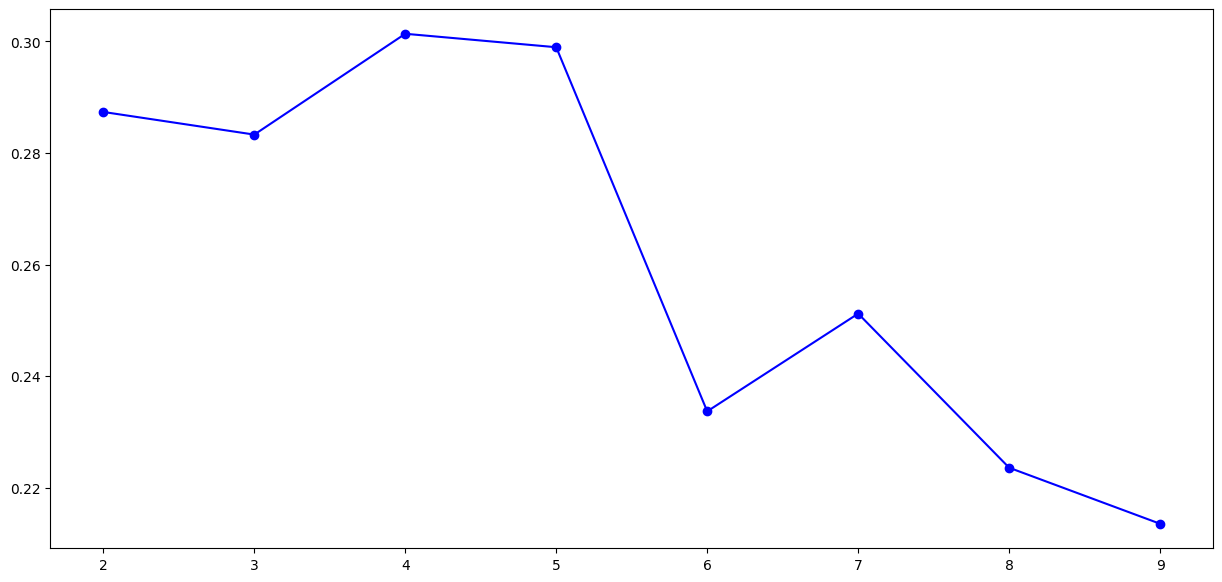

In [34]:
# # Bagaimana jika menggunakan metode silhouette untuk menentukan jumlah k?
# # Apakah jumlah k akan berubah? Apakah jumlah k optimal dapat ditentukan dengan lebih jelas?

# from sklearn.metrics import silhouette_score

# silhouette_avg = []

# for i in range(2,10):
#     kmeans = KMeans(n_clusters = i, random_state = 26)
#     kmeans.fit(df_scaled)
#     silhouette = silhouette_score(df_scaled, kmeans.labels_)
#     silhouette_avg.append(silhouette)

# plt.figure(figsize=(15, 7))

# plt.plot(range(2,10), silhouette_avg, 'bo-')

## Membuat Cluster dengan Jumlah k yang optimal

In [15]:
kmeans = KMeans(n_clusters = 3, random_state = 26)
kmeans.fit(df_scaled)

C:\Users\Raditya Arviandana\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=26)

In [16]:
# Menambahkan label klaster ke dalam data

df_clustered = df_scaled.copy()

df_clustered['Cluster'] = kmeans.labels_
df_clustered

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
country,,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1


## Visualisasi Hasil Clustering

In [17]:
# Gunakan Dimensionality Reduction untuk mempermudah melakukan visualisasi

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
df_pca = pd.DataFrame(pca.fit_transform(df_clustered.iloc[:,:-1]),
                      columns = ['PC_1', 'PC_2'],
                      index = df_clustered.index)

df_pca = pd.concat([df_pca, df_clustered.Cluster], axis = 1)

df_pca.head(10)

,PC_1,PC_2,Cluster
country,,,
Afghanistan,-2.913025,0.095621,2
Albania,0.429911,-0.588156,1
Algeria,-0.285225,-0.455174,1
Angola,-2.932423,1.695555,2
Antigua and Barbuda,1.033576,0.136659,1
Argentina,0.022407,-1.779187,1
Armenia,-0.101584,-0.568252,1
Australia,2.342165,-1.988459,0
Austria,2.973764,-0.734689,0


<Axes: xlabel='PC_1', ylabel='PC_2'>

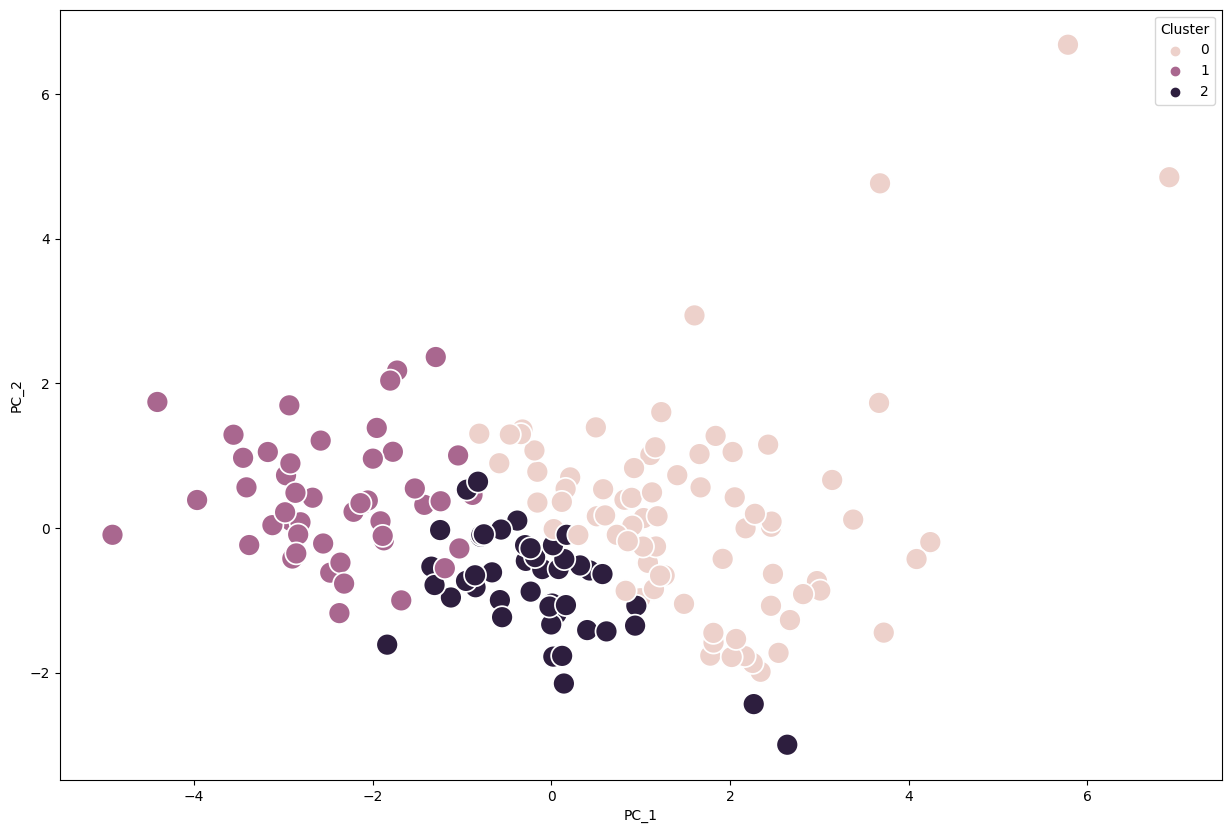

In [38]:
# Visualisasi hasil clustering

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data = df_pca, x = 'PC_1', y = 'PC_2', hue = 'Cluster', s = 250, ax = ax)

# Memberi nama untuk tiap titik
#for i, j in enumerate(df.index):
#    ax.annotate(j, (df_pca['PC_1'][i], df_pca['PC_2'][i]))

## Menilai Seberapa Baik Tata Telah dikelompokkan oleh Algoritma

In [39]:
# Gunakan metric silhouette score dan davies-bouldin index

from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(df_scaled, kmeans.labels_)
db_index = davies_bouldin_score(df_scaled, kmeans.labels_)

print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")

Silhouette Score: 0.21
Davies-Bouldin Index: 1.11


## Interpretasi

In [20]:
# Mengembalikan data ke nilai semula untuk mempermudah interpretasi

df_unscaled = pd.DataFrame(scaler.inverse_transform(df_clustered.iloc[:, :-1]),
                           index = df.index,
                           columns = scaler.get_feature_names_out())

df_unscaled['Cluster'] = df_clustered['Cluster']

df_unscaled.groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
2,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979


## Interpretasikan hasil di atas

Contoh:  

**Cluster 0**
- Negara Maju
- Negara kaya
- dst.

# **Algoritma K-Median**

Konsep algoritma Clustering K-Median sejatinya tidak jauh berbeda dengan K-Means, yang membedakan keduanya hanyalah perhitungan untuk mencari centroid yang baru. Pada K-Means, perhitungan centroid baru didasarkan kepada nilai rata-rata dari semua titik yang ada pada tiap klaster, sedangkan pada K-Medians didasarkan pada perhitungan nilai median.

In [21]:
# Gunakan kmeans_plusplus untuk membuat centroid awal

from sklearn.cluster import kmeans_plusplus

initial_centroids = kmeans_plusplus(df_scaled.values, n_clusters = 3, random_state = 26)[0]
initial_centroids

array([[-0.87719   , -0.08814462,  0.77934365, -0.39318127,  1.1787202 ,
        -0.70507894,  1.06516724, -0.71421068,  1.81877565],
       [ 0.63245964,  0.60706682, -1.21072348, -1.15963952, -0.0907734 ,
         0.83671708, -0.86343921,  0.75003626, -0.23061258],
       [-0.47428516, -0.51990751,  0.03443779, -0.01202366, -0.51220366,
        -0.48693696,  0.39974162, -0.44918861, -0.54581888]])

## Membuat Cluster dengan Jumlah k yang optimal

In [22]:
# Gunakan kmedians dari library pyclustering

from pyclustering.cluster.kmedians import kmedians

import random

random.seed(26)

k_median = kmedians(df_scaled, initial_centroids)
k_median.process();

In [23]:
# Mendaftarkan label hasil klaster kmedian

clusters = k_median.get_clusters()

label = np.zeros([df_scaled.shape[0]])
label[clusters[0]] = 0
label[clusters[1]] = 1
label[clusters[2]] = 2

label

array([1., 2., 2., 1., 2., 2., 2., 0., 0., 2., 2., 0., 2., 2., 2., 0., 2.,
       1., 2., 2., 2., 1., 2., 0., 2., 1., 1., 1., 1., 0., 2., 1., 1., 2.,
       2., 2., 1., 1., 1., 2., 1., 2., 0., 0., 0., 2., 2., 2., 2., 1., 1.,
       0., 1., 0., 0., 1., 1., 2., 0., 1., 2., 2., 2., 1., 1., 1., 1., 0.,
       0., 2., 2., 2., 1., 0., 2., 0., 2., 2., 2., 2., 1., 1., 0., 1., 1.,
       2., 2., 1., 1., 2., 0., 0., 2., 1., 1., 0., 2., 1., 0., 1., 2., 1.,
       2., 1., 2., 2., 1., 2., 1., 2., 0., 2., 1., 1., 0., 2., 1., 0., 2.,
       2., 2., 2., 2., 0., 2., 2., 1., 2., 2., 1., 2., 0., 1., 0., 0., 0.,
       1., 1., 0., 2., 2., 2., 1., 2., 0., 0., 1., 1., 2., 1., 1., 2., 2.,
       2., 1., 1., 2., 0., 0., 0., 2., 2., 1., 2., 2., 1., 1.])

In [24]:
# Masukkan klaster ke dalam data

df_pca['Cluster'] = label.astype(int)
df_pca.head()

,PC_1,PC_2,Cluster
country,,,
Afghanistan,-2.913025,0.095621,1
Albania,0.429911,-0.588156,2
Algeria,-0.285225,-0.455174,2
Angola,-2.932423,1.695555,1
Antigua and Barbuda,1.033576,0.136659,2


## Visualisasi Data Hasil Clustering

<Axes: xlabel='PC_1', ylabel='PC_2'>

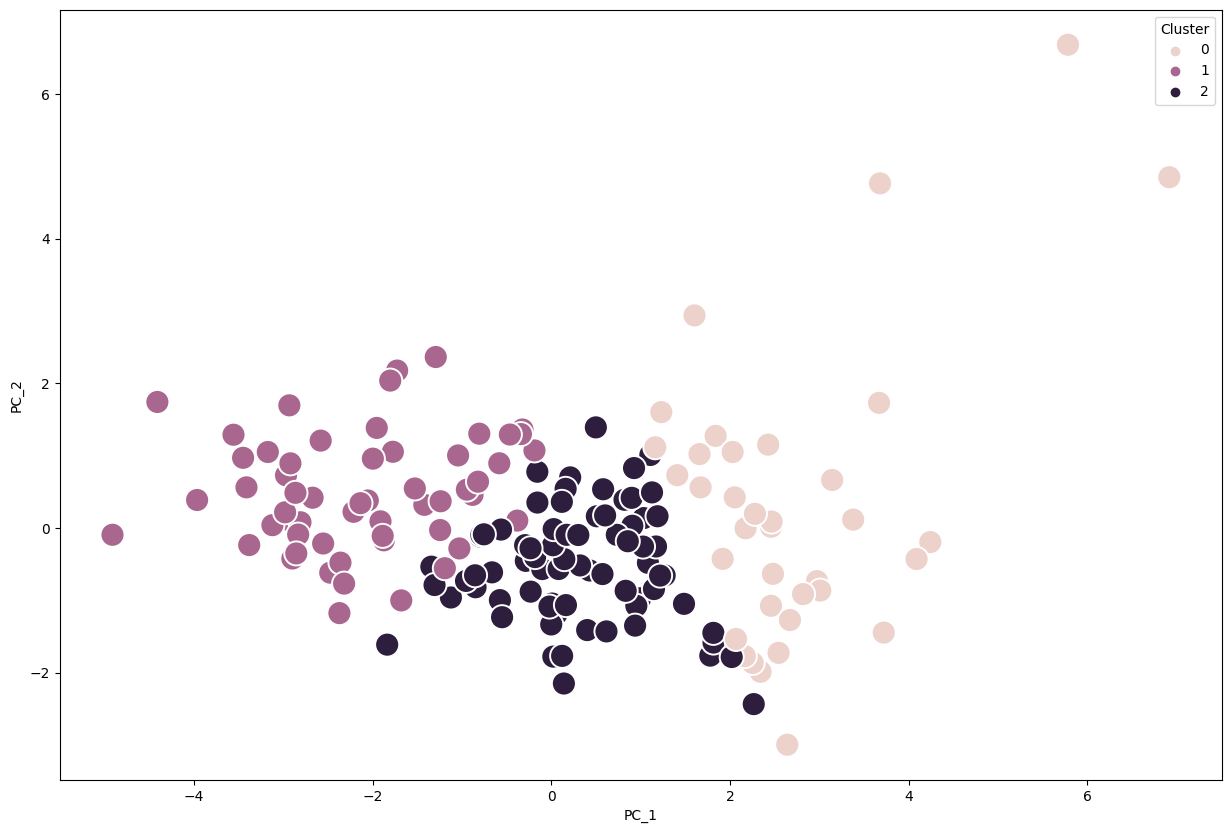

In [25]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data = df_pca, x = 'PC_1', y = 'PC_2', hue = 'Cluster', s = 300, ax = ax)

In [26]:
# # Apakah hasil Clustering di atas sudah baik?
# # Bagaimana hasilnya apabila pencarian jumlah k optimal menggunakan metode Clustering yang berbeda?
# # Coba Gunakan Silhouette Method dengan K-Medians untuk mencari jumlah k optimal!

# ...

## Interpretasi

...

# **Algoritma K-Medoids**

Meskipun K-Medoids serupa dengan K-Medians, namun terdapat sedikit perbedaan di antara keduanya. Perbedaan tersebut terdapat pada cara algoritma memperabarui nilai centroid. Pada K-Medians, centroid baru merupakan nilai median dari semua data pada tiap klaster yang sama, sedangkan pada K-Medoid centroid yang baru merupakan titik tengah yang aktual pada data.

<img src="https://raw.githubusercontent.com/ArviandanaR/Praktikum-Data-Mining-2024/main/Pertemuan%208/asset/Kmedoid.png" alt="Kmedoid" width="750"/>

In [27]:
from sklearn_extra.cluster import KMedoids

## Membuat Cluster dengan Jumlah k Optimal

In [28]:
kmedoid = KMedoids(n_clusters = 3, random_state = 26)
kmedoid.fit(df_scaled)

KMedoids(n_clusters=3, random_state=26)

In [29]:
# Masukkan klaster hasil Clustering ke dalam data

df_pca['Cluster'] = kmedoid.labels_
df_pca.head()

,PC_1,PC_2,Cluster
country,,,
Afghanistan,-2.913025,0.095621,1
Albania,0.429911,-0.588156,2
Algeria,-0.285225,-0.455174,2
Angola,-2.932423,1.695555,1
Antigua and Barbuda,1.033576,0.136659,0


## Visualisasi Hasil Clustering

<Axes: xlabel='PC_1', ylabel='PC_2'>

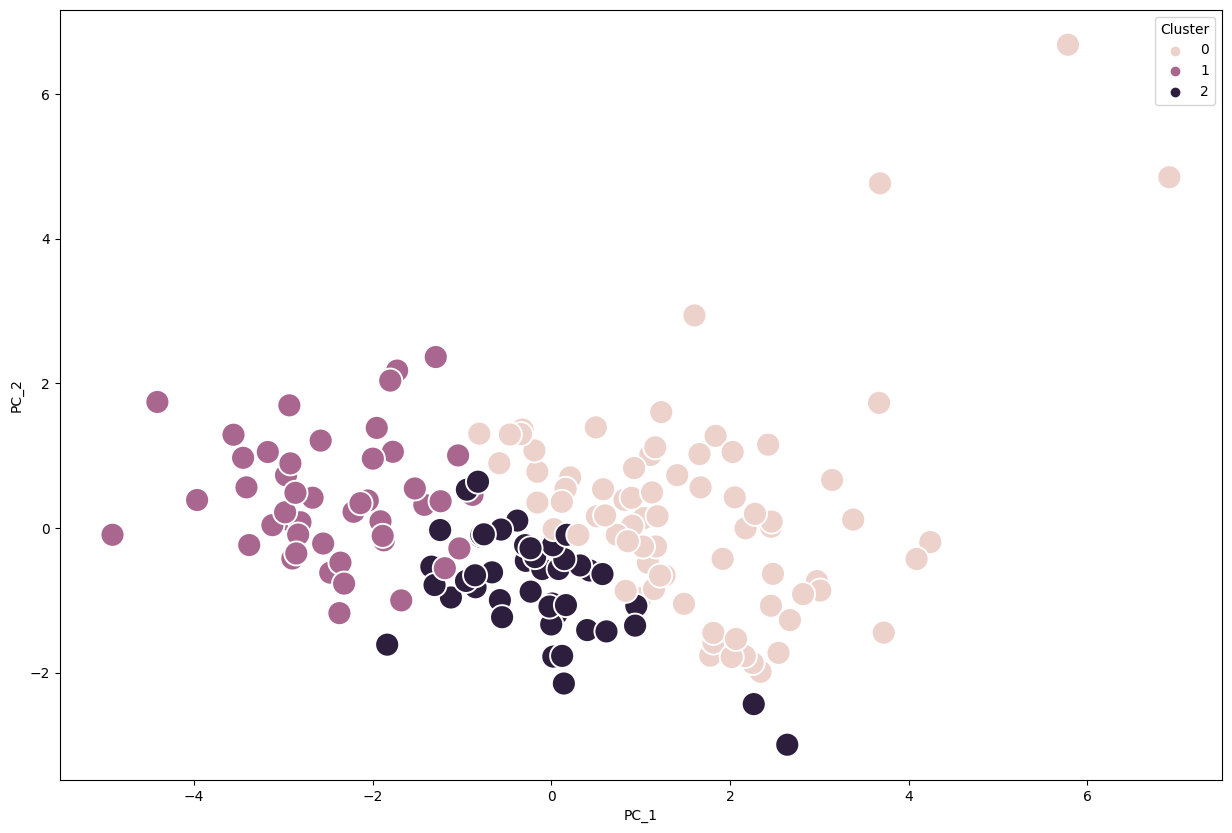

In [30]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

sb.scatterplot(data = df_pca, x = 'PC_1', y = 'PC_2', hue = 'Cluster', s = 300, ax = ax)

In [31]:
# # Seberapa baik algoritma telah mengelompokkan data? Interpretasikan hasilnya!
# # Bagaimana jika jumlah k optimal diganti dengan nilai yang lebih besar atau kecil?

# ... 

## Interpretasi

...